# Case Study on Thera Bank Personal Loan Campaign

Import the datasets and libraries, check datatype, statistical summary, shape, null values or
incorrect imputation

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import os
pd.options.mode.chained_assignment = None
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
sns.set_style("white")


ModuleNotFoundError: No module named 'plotly'

In [2]:
pers_loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
pers_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
pers_loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [5]:
pers_loan.shape

(5000, 14)

In [6]:
pers_loan.isnull().values.any() # If there are any null values in data set
pers_loan.isna().values.any() # If there are any nan values in data set

False

False

In [7]:
pers_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


Observations of the above:

- ID and ZIP are nominal data and won't have any impact on the target feature
- Age, Experience, Income, CCAvg and Mortgage are Continuous data
- Family and Education are Categorical and Ordinal data
- Securities Account, CD Account, Online, CreditCard and Personal Loan are Categorical and Binary data
- Personal Loan is a target feature

Above describe() shows that Experience has Negative value. Finding out how many of them are Negative.

In [8]:
(pers_loan.Experience < 0).value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In the given problem, it is safe to set Negative Experience values to 0

In [9]:
# Setting Negative columns to zero
pers_loan.loc[pers_loan.Experience < 0, 'Experience'] = 0

(pers_loan.Experience < 0).value_counts()

False    5000
Name: Experience, dtype: int64

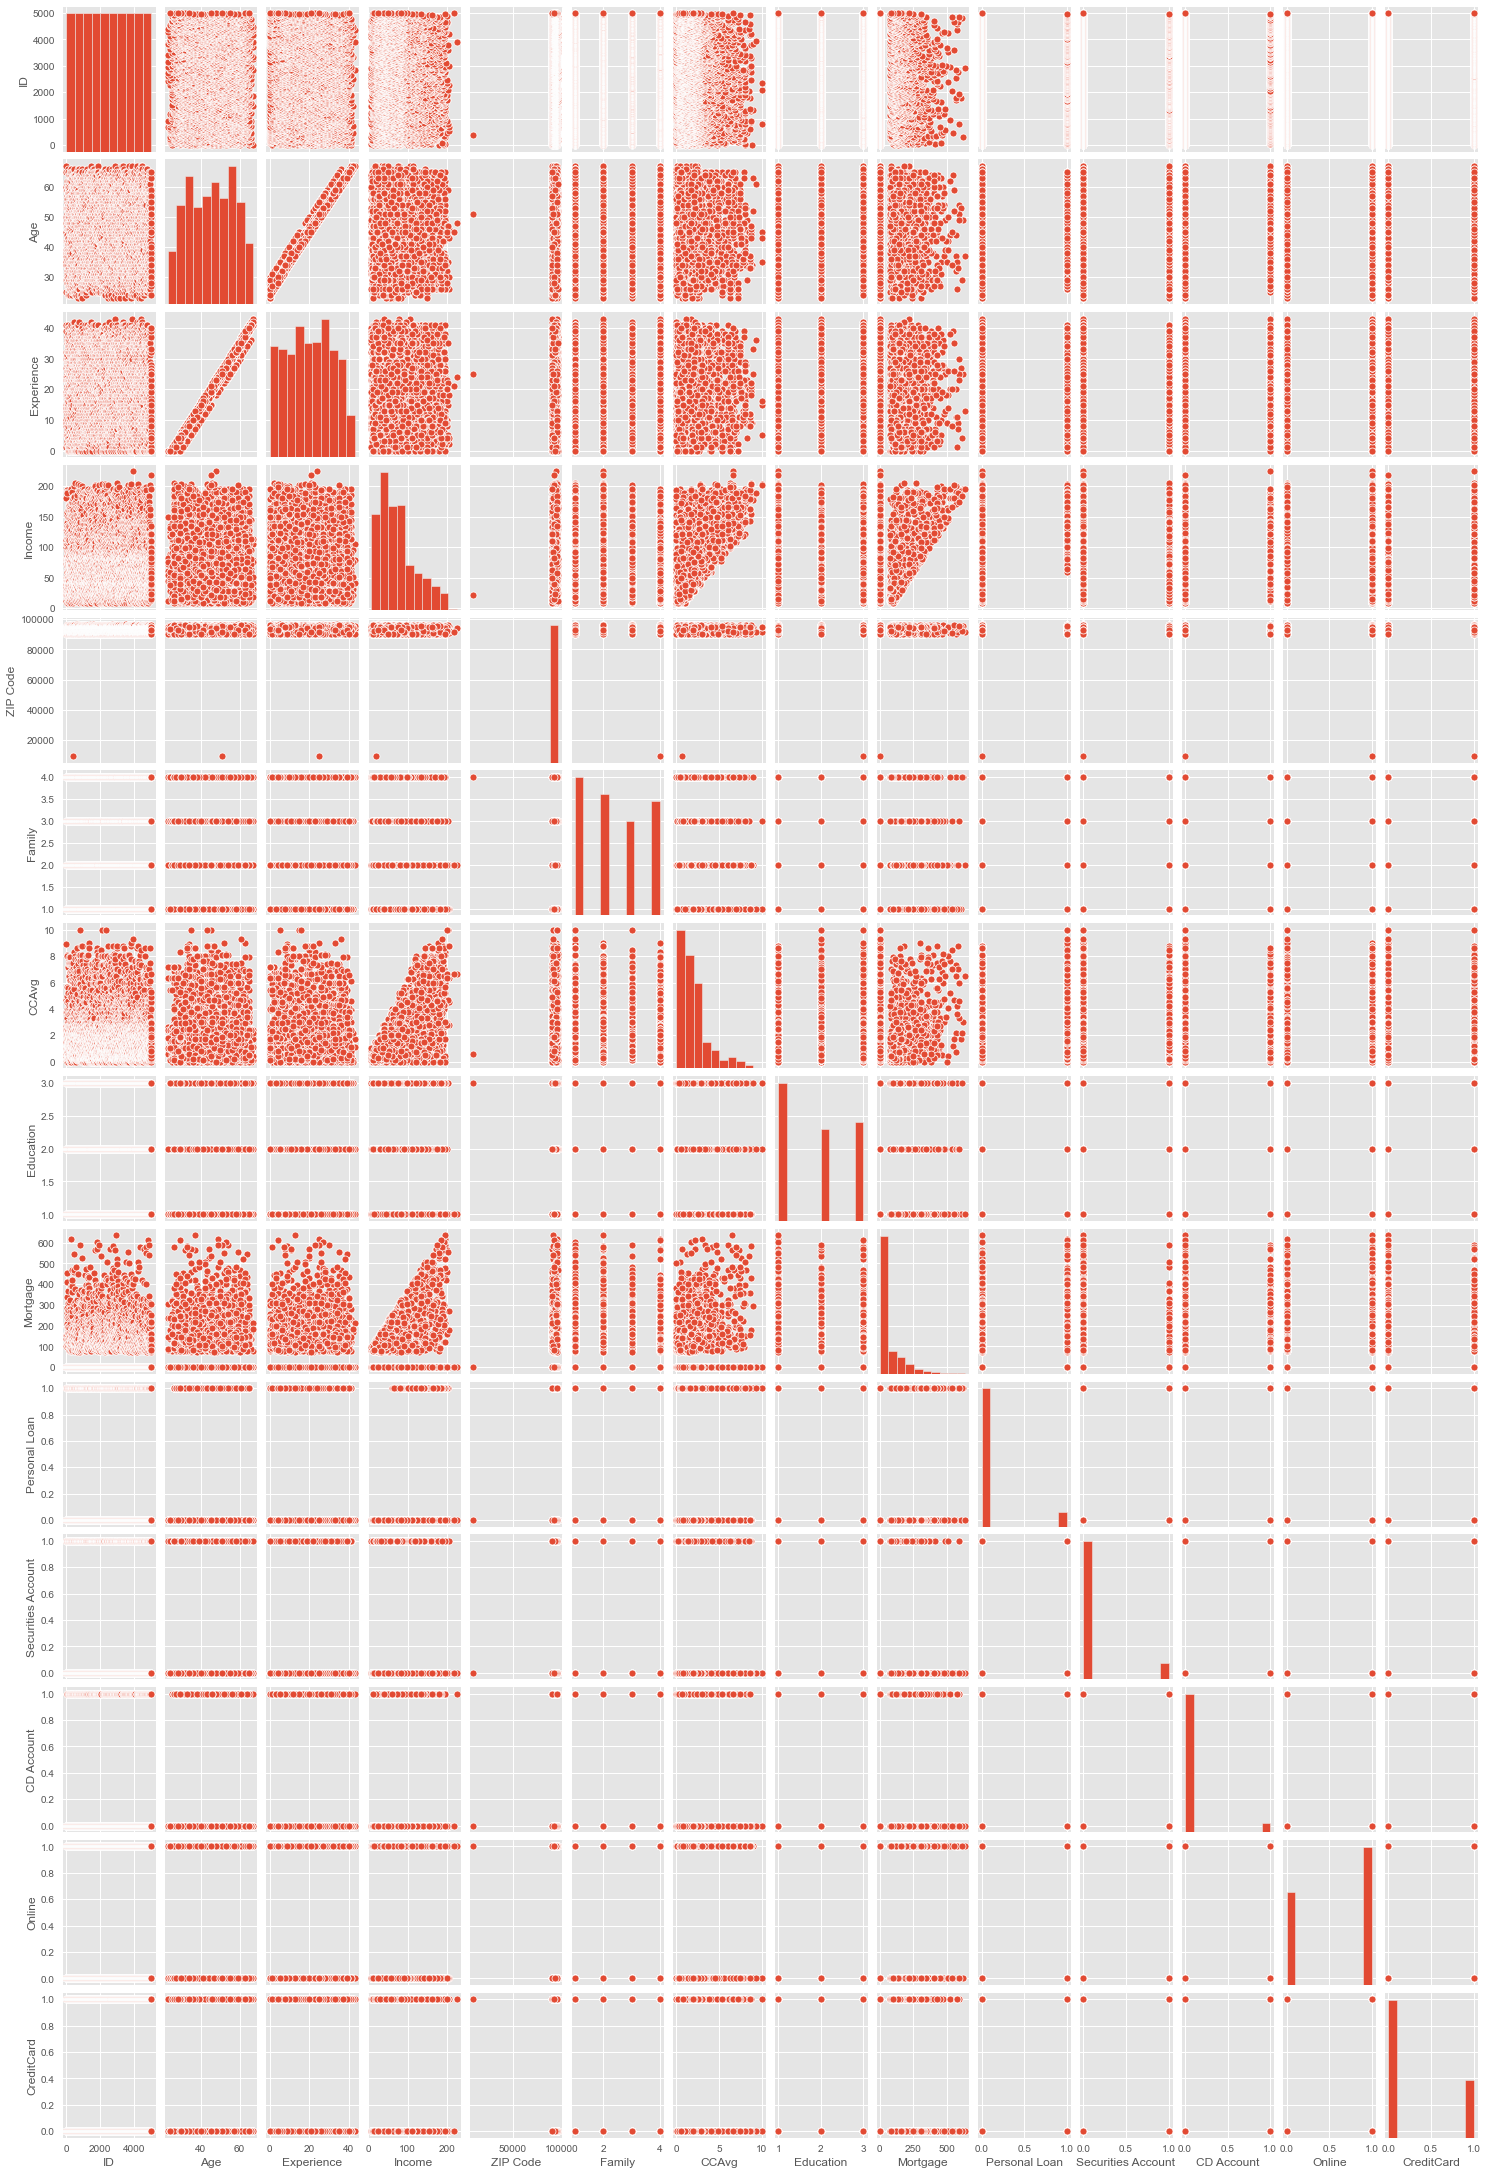

In [10]:
#sns.kdeplot(pers_loan, cumulative=False, bw=1.5)
g=sns.pairplot(pers_loan)
g.fig.set_size_inches(20,30);

Observations:Age and experience have influence over personal loan.Age and experience are normally distributed. income , morgage, cc avg are related.

In [11]:
pers_loan.corr() # Shows the  correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


In [12]:
corr_list = pers_loan.corrwith(pers_loan["Personal Loan"])
corr_list

ID                   -0.02
Age                  -0.01
Experience           -0.01
Income                0.50
ZIP Code              0.00
Family                0.06
CCAvg                 0.37
Education             0.14
Mortgage              0.14
Personal Loan         1.00
Securities Account    0.02
CD Account            0.32
Online                0.01
CreditCard            0.00
dtype: float64

In [13]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

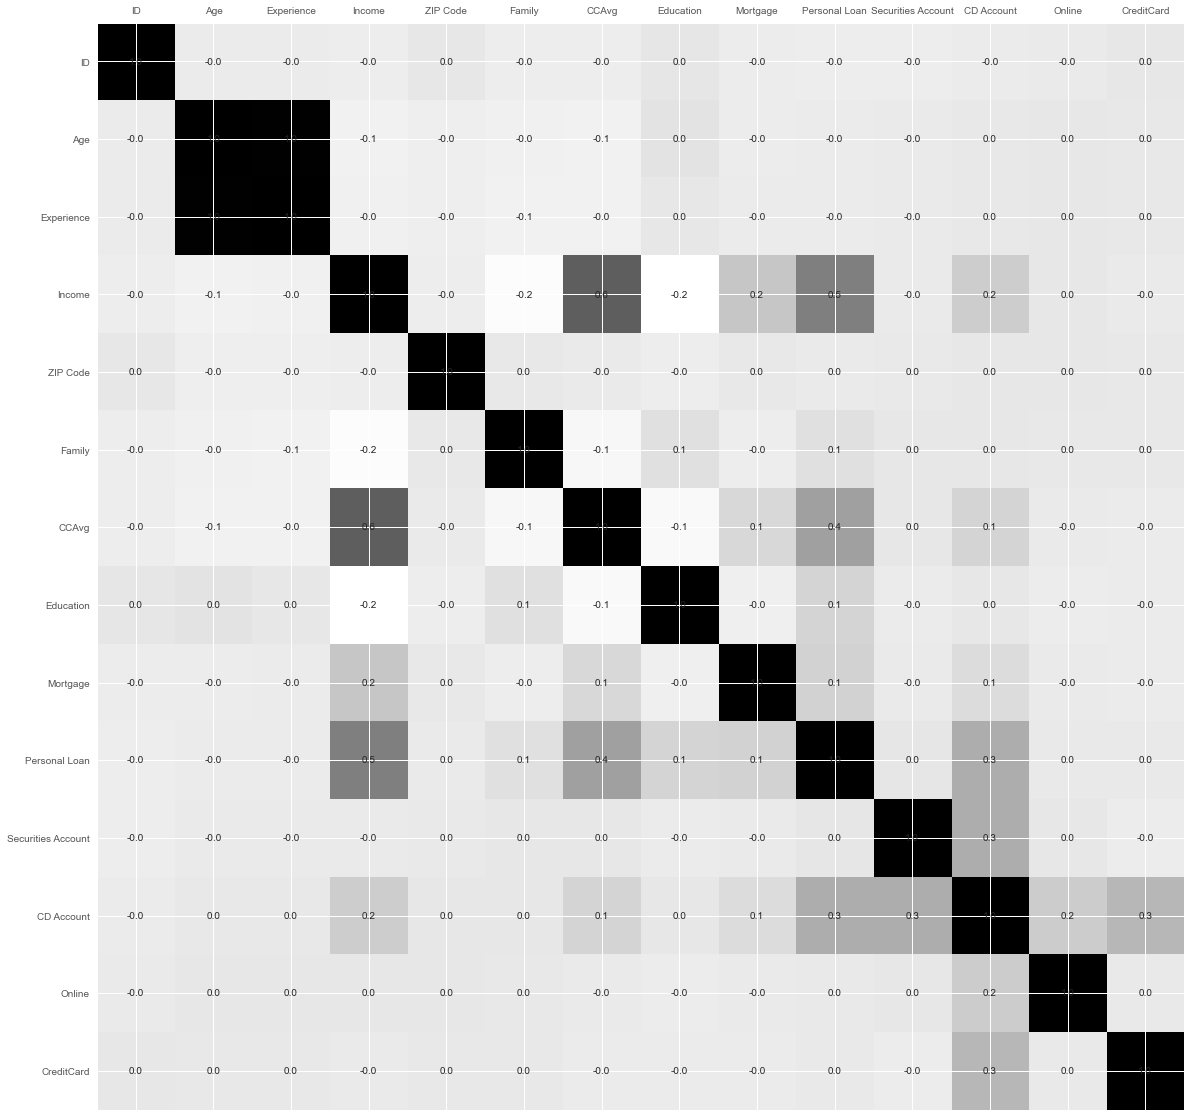

In [14]:
plot_corr(pers_loan)

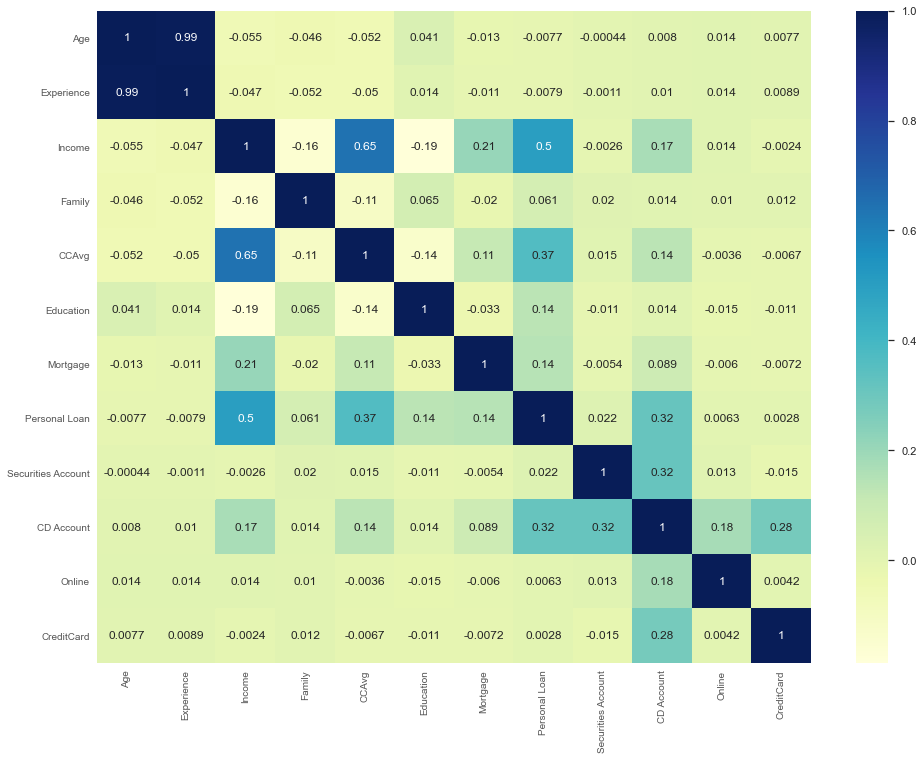

In [15]:

#Correlation analysis using heat map
f, ax = plt.subplots(figsize=(16, 12))
sns.set()
sns.heatmap(pers_loan[['Age','Experience','Income','Family','CCAvg', 'Education', 'Mortgage', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']].corr(),annot=True,cmap='YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f815e97b3d0>,
      dtype=object)

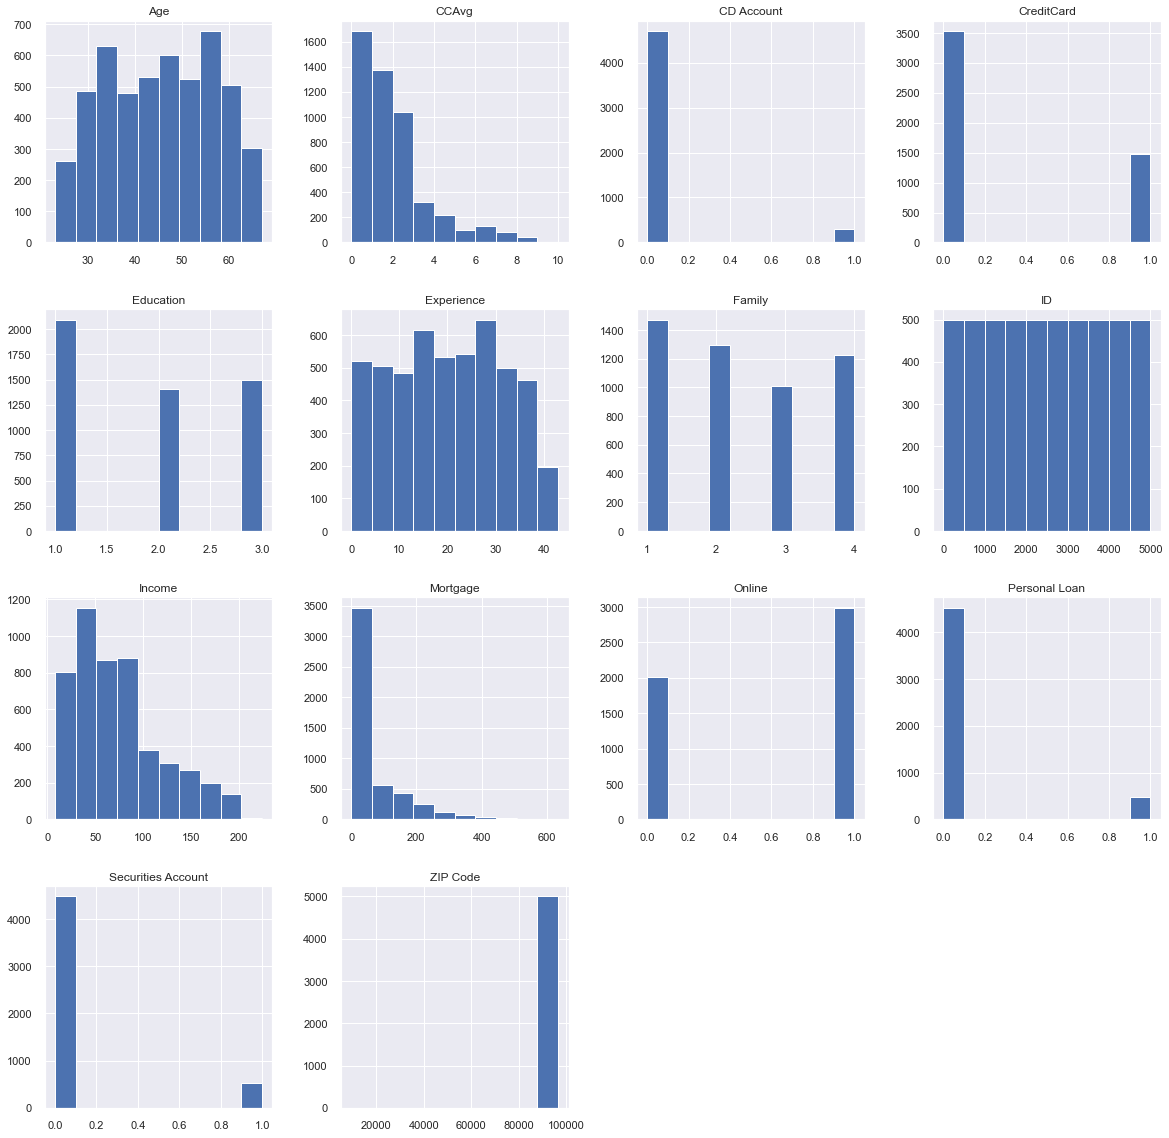

In [16]:
pers_loan.hist(figsize = [20,20])

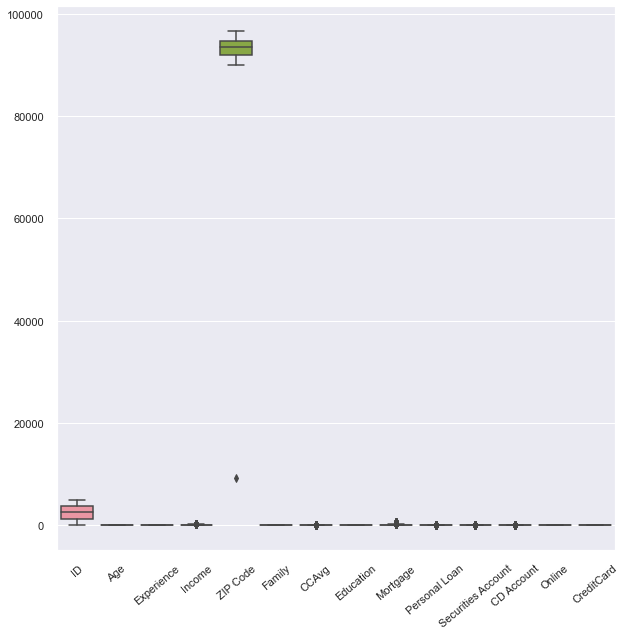

In [17]:
fig, axs = plt.subplots(figsize = (10,10))
plot = sns.boxplot(data=pers_loan,ax=axs)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

Findings. From Box plot we can see that , Zip code is adding outlier and logically adds no value in analysis.

# EDA: Study the data distribution in each attribute and target variable, share your findings
(20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

ID,Zip Code & Experience is not adding any value to our analysis, hence dropping it. Experience is highly correlated with Age

In [18]:
#dropiing zipcode and ID
persloan_df = pers_loan.drop("ZIP Code", axis=1)
persloan_df1 = persloan_df.drop("ID", axis=1)
persloan_df1 = persloan_df.drop("Experience", axis=1)
persloan_df1
persloan_df1.shape
persloan_df1.isnull().values.any()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,4,1.60,1,0,0,1,0,0,0
1,2,45,34,3,1.50,1,0,0,1,0,0,0
2,3,39,11,1,1.00,1,0,0,0,0,0,0
3,4,35,100,1,2.70,2,0,0,0,0,0,0
4,5,35,45,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,1,1.90,3,0,0,0,0,1,0
4996,4997,30,15,4,0.40,1,85,0,0,0,1,0
4997,4998,63,24,2,0.30,3,0,0,0,0,0,0
4998,4999,65,49,3,0.50,2,0,0,0,0,1,0


(5000, 12)

False

(array([4520.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         480.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

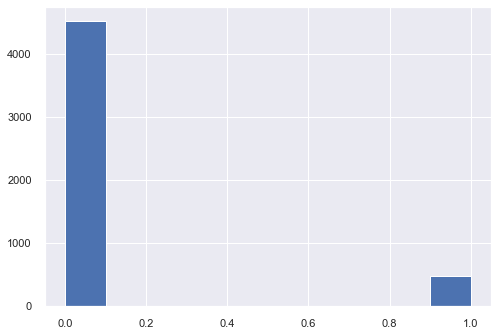

In [19]:
plt.hist(persloan_df1['Personal Loan'])

In [20]:
pers_loan.nunique() #Number of unique in each column?


ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [21]:
#Number of people with zero mortgage?
(pers_loan["Mortgage"]== 0).sum()

3462

In [22]:
#Number of people with zero credit card spending per month?
(pers_loan["CCAvg"]== 0).sum()

106

# Value counts of all categorical columns.

In [23]:
pers_loan['Family'].value_counts().sort_index()
#pers_loan.sort(['Family'],ascending=True)

1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

In [24]:
pers_loan['Education'].value_counts().sort_index()

1    2096
2    1403
3    1501
Name: Education, dtype: int64

In [25]:
pers_loan['Personal Loan'].value_counts().sort_index()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [26]:
pers_loan['Securities Account'].value_counts().sort_index()

0    4478
1     522
Name: Securities Account, dtype: int64

In [27]:
pers_loan['CD Account'].value_counts().sort_index()

0    4698
1     302
Name: CD Account, dtype: int64

In [28]:
pers_loan['Online'].value_counts().sort_index()

0    2016
1    2984
Name: Online, dtype: int64

In [29]:
pers_loan['CreditCard'].value_counts().sort_index()

0    3530
1    1470
Name: CreditCard, dtype: int64

# Univariate & Bivariate Plots

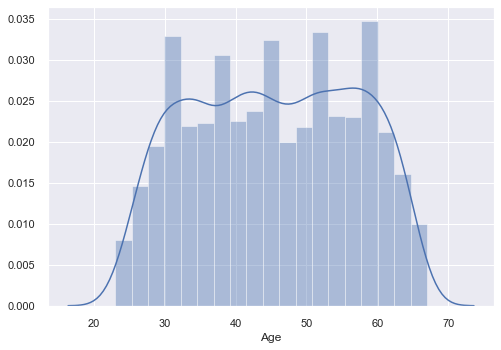

In [30]:
sns.distplot(pers_loan['Age'])

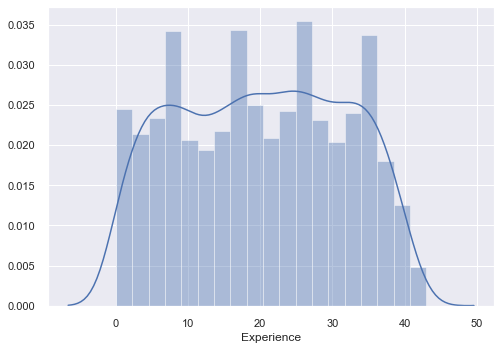

In [31]:
sns.distplot(pers_loan['Experience'])

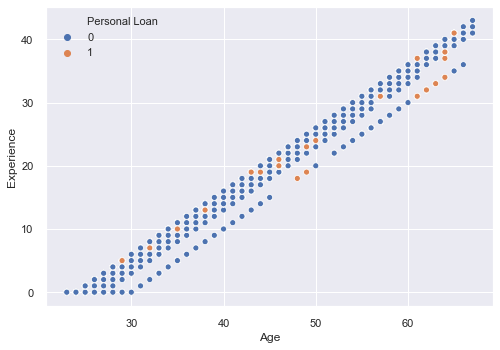

In [32]:
sns.scatterplot(data=pers_loan, x='Age', y='Experience', hue='Personal Loan')

With reference to above and also from the corr map below are the observations:
- Age and Experience are strongly correlated. It can be safer to consider to only one of them. The other won't have -additional impact on the target variable.
- Both of them don't seem to have much impact on whether the customer applied for the Personal Loan or not
- Both of them can be excluded in the modeling

# Family & Income

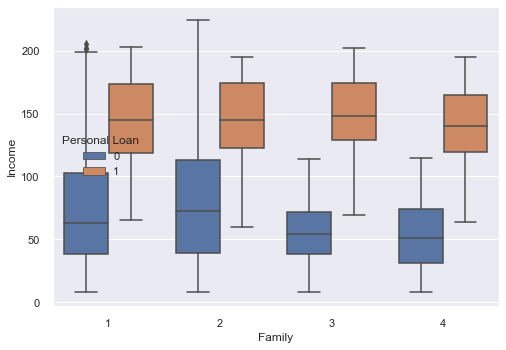

In [33]:
sns.boxplot(data=pers_loan, x='Family', y='Income', hue='Personal Loan')

Observation:
- Proportion of customers who applied for Persoanl Loan are almost same with number of Family members
- So, Family members may not have much impact on the target variable
- Customers who applied for Personal Loan seemed to have higher Income than who didn't apply
- So, Income seemed to be impacting the target variable and so should be included in the modeling

# Education & Income

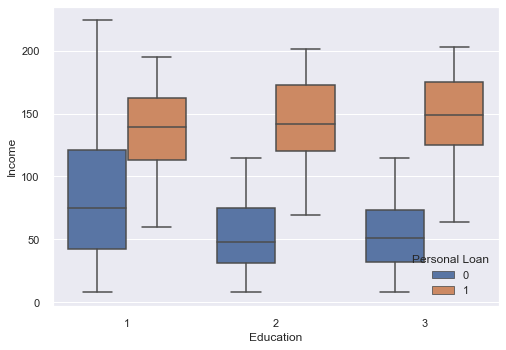

In [34]:
sns.boxplot(data=pers_loan, x='Education', y='Income', hue='Personal Loan')


Observation:
- Proportion of customers who applied for Persoanl Loan are almost same with all education level.
- So, Education may not have much impact on the target variable

# Mortgage & Family

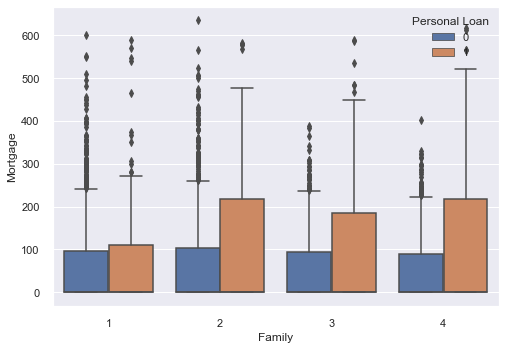

In [35]:
sns.boxplot(data=pers_loan, x='Family', y='Mortgage', hue='Personal Loan')

Observations:
- Customers who applied for Personal Loan have high Mortgage than who didn't apply for Persoanl Loan
- Mortgage amount seemed to high impact on the target variable and so should be included in the modeling

# CCAvg and CreditCard:

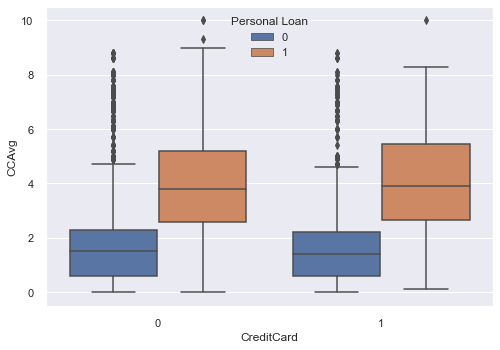

In [36]:
sns.boxplot(data=pers_loan, x='CreditCard', y='CCAvg', hue='Personal Loan')

Observations:
- Customers who applied for Personal Loan seemed to have high Credit Card spending than who didn't apply
- Credit Card spending has higher impact on target variable and so must be included in the modeling
- Number of customers who applied for Personal Loan are almost same whether the customers use the CreditCard issued by the bank or not
- CreditCard doesn't seem to have much impact on the target variable

# Securities Account

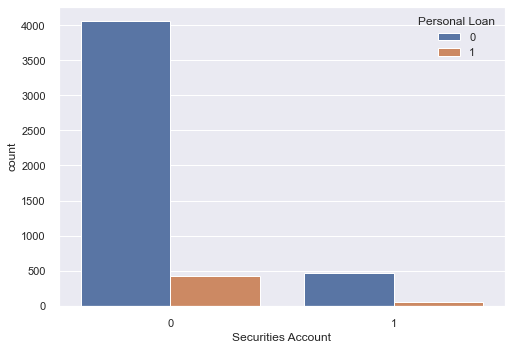

In [37]:
sns.countplot(data=pers_loan, x='Securities Account', hue='Personal Loan')

Observations:
More number of customer who doesnt have Securities Account applied for Personal Loan

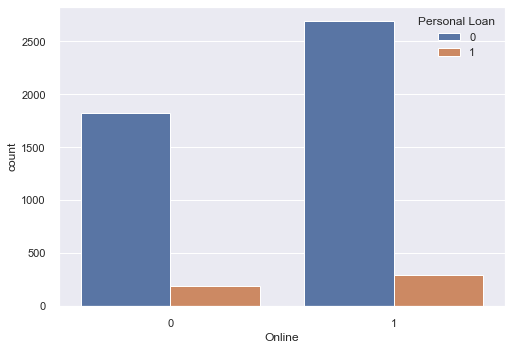

In [38]:
sns.countplot(data=pers_loan, x='Online', hue='Personal Loan')

The number of customers who use internet banking and applied for Personal Loan are slighly higher than the customers who don't user internet banking

# CD Account:

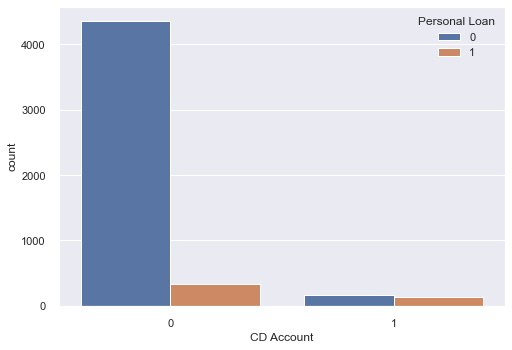

In [39]:
sns.countplot(data=pers_loan, x='CD Account', hue='Personal Loan')

Observations:
The number of customers having CD Account is significantly less than those who don't have CD Account
The number of customers who have CD Account and applied for Personal Loan are less than the customers who don't have CD Account

# Get the Target Model

In [40]:

pers_loan['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Observations:
- Personal Loan is Categorical and Binary variable- 
- Personal Loan is highly right-skewed distribution. Only 480 out of 4520 applied for the Personal Loan

# Data Processing

Deleted Unwanted attribute (already done above)

In [41]:
persloan_df1
#ID & Zip code has been dropped previously

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,4,1.60,1,0,0,1,0,0,0
1,2,45,34,3,1.50,1,0,0,1,0,0,0
2,3,39,11,1,1.00,1,0,0,0,0,0,0
3,4,35,100,1,2.70,2,0,0,0,0,0,0
4,5,35,45,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,1,1.90,3,0,0,0,0,1,0
4996,4997,30,15,4,0.40,1,85,0,0,0,1,0
4997,4998,63,24,2,0.30,3,0,0,0,0,0,0
4998,4999,65,49,3,0.50,2,0,0,0,0,1,0


Delete Attribute with low corelation

In [42]:
persloan_df1.corr()['Personal Loan']

ID                   -0.02
Age                  -0.01
Income                0.50
Family                0.06
CCAvg                 0.37
Education             0.14
Mortgage              0.14
Personal Loan         1.00
Securities Account    0.02
CD Account            0.32
Online                0.01
CreditCard            0.00
Name: Personal Loan, dtype: float64

Delete Attribute with low correlation (< 0.01)

In [43]:
persloan_df1.drop(labels=['Age', 'Online', 'CreditCard'], inplace=True, axis=1)

In [44]:
persloan_df1.corr()['Personal Loan']

ID                   -0.02
Income                0.50
Family                0.06
CCAvg                 0.37
Education             0.14
Mortgage              0.14
Personal Loan         1.00
Securities Account    0.02
CD Account            0.32
Name: Personal Loan, dtype: float64

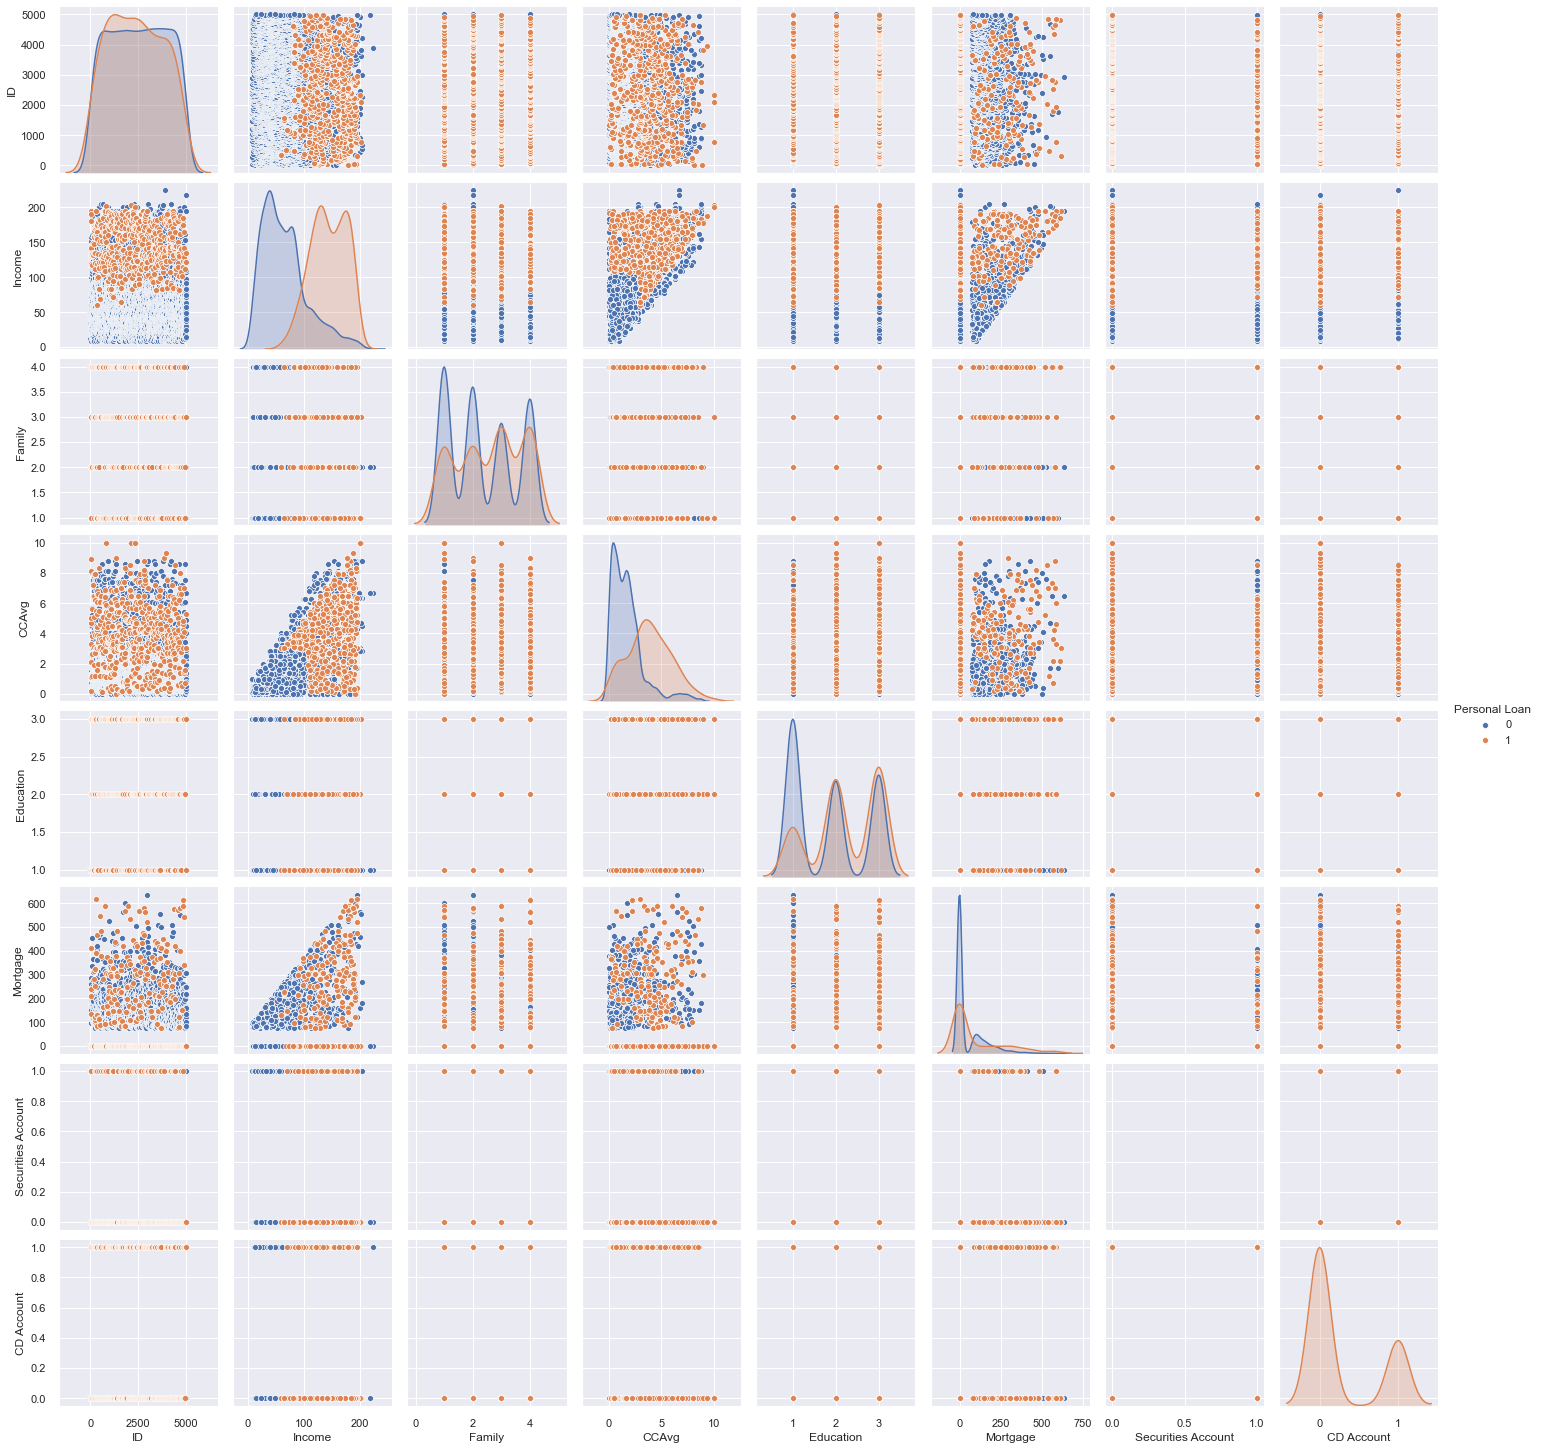

In [45]:

sns.pairplot(persloan_df1,  hue='Personal Loan')



In [46]:
X=pers_loan.drop('Personal Loan',axis=1)
y=pers_loan['Personal Loan']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [47]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)